In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

news_df=pd.read_csv('/content/gdrive/MyDrive/FS-Sem3/CompanyProject_RegHub/news_df_with_company_names.csv')
print(f"Length of raw dataframe = {len(news_df)}")
news_df.head(2)

Mounted at /content/gdrive
Length of raw dataframe = 5588


,id,found_dates,news_date,news_title,internal_links,keywords,language,news_author,news_content,news_label,...,news_summary,news_topic,news_type,sentiment_label,sentiment_score,source_country,source_name,source_type,llm_output_company,companies_in_news
0,focScholzPresid217207826html,[],2023-10-03T16:59:33.000Z,CumExAffäre: Brisante Tagebucheinträge belaste...,[],NaN,en,NaN,The article discusses how M.M. Warburg may hav...,NaN,...,The article discusses how M.M. Warburg may hav...,"[{""description"":""M.M. Warburg"",""relevance"":12,...",Press releases,NaN,0.0,Global,focus.de,Information Provider,"'The article states that Berenberg, a German i...","Nordea, Berenberg"
1,merngnisPresente92556026html,[],2023-10-03T16:06:01.000Z,CumExAffäre: Dokumente bringen Scholz offenbar...,[],NaN,en,NaN,The Cologne Prosecutor's Office accuses German...,NaN,...,The Cologne Prosecutor's Office accuses German...,"[{""description"":""M.M. Warburg"",""relevance"":6,""...",Press releases,NaN,0.0,Global,merkur.de,Information Provider,"'In their analysis on October 30, 2023, expert...","Sanofi, Berenberg Bank"


In [3]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5588 entries, 0 to 5587
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5588 non-null   object 
 1   found_dates         5073 non-null   object 
 2   news_date           5588 non-null   object 
 3   news_title          5587 non-null   object 
 4   internal_links      5039 non-null   object 
 5   keywords            370 non-null    object 
 6   language            5588 non-null   object 
 7   news_author         804 non-null    object 
 8   news_content        5588 non-null   object 
 9   news_label          36 non-null     object 
 10  news_legalinforce   5588 non-null   object 
 11  news_link           5588 non-null   object 
 12  news_rank           5588 non-null   float64
 13  news_summary        5588 non-null   object 
 14  news_topic          5588 non-null   object 
 15  news_type           5588 non-null   object 
 16  sentim

<Axes: >

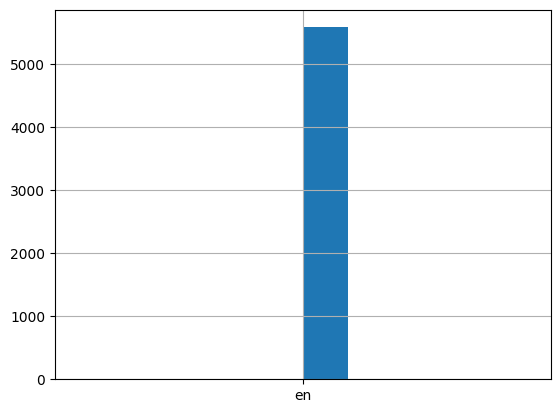

In [4]:
news_df.language.hist()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=8e3f4e060e641f9990904ca9a2ecdc02b49b8e27f0f7ae04b7fc88b0b4126ae2
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


<Axes: >

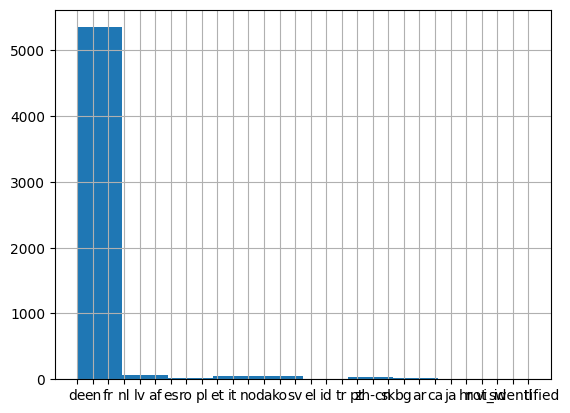

In [5]:
# There are still rows of news that are wrongly labelled as English, even if they are not in English.
# We check this through 'langdetect' python library
!pip install langdetect
from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0
for index, row in news_df.iterrows():
  title_str = str(row['news_title']) if not pd.isnull(row['news_title']) else '' # Convert 'news_title' to string and handle potential NaN values

  if len(title_str) > 3: # ensure that text has sufficient length for language detection
    news_df.at[index, 'language'] = detect(title_str) # Use langdetect on the string
  else:
    news_df.at[index, 'language'] = 'not_identified'

news_df.language.hist()


In [6]:
# hereonwards, only working on news with english language
news_df_en = news_df[news_df.language == 'en']
news_df_en = news_df_en.reset_index(drop=True)
print(len(news_df_en))
news_df_en.head(5)

3168


,id,found_dates,news_date,news_title,internal_links,keywords,language,news_author,news_content,news_label,...,news_summary,news_topic,news_type,sentiment_label,sentiment_score,source_country,source_name,source_type,llm_output_company,companies_in_news
0,maretBeatPresfiling20231003,[],2023-10-03T15:45:10.000Z,K.J. Harrison & Partners Inc Boosts Stake in C...,[],NaN,en,NaN,Deutsche Bank AG has acquired an additional 49...,NaN,...,Deutsche Bank AG has acquired an additional 49...,"[{""description"":""Deutsche Bank"",""relevance"":6,...",Press releases,NaN,0.0,Global,marketbeat.com,Information Provider,"'Berenberg Bank has issued a \""buy\"" recommend...","Berenberg Bank, Sartorius"
1,busTIMESPresesginvestingubs,[],2023-10-03T15:35:31.000Z,Conference aims to connect investors as ESG tr...,[],NaN,en,NaN,The UBS APAC Sustainable Finance Conference 20...,NaN,...,The UBS APAC Sustainable Finance Conference 20...,"[{""description"":""Sustainability"",""relevance"":6...",Press releases,NaN,0.0,Global,businesstimes.com.sg,Information Provider,'In a research note published by Sebastian Bra...,"Answer:\n\nBerenberg, Sebastian Bray"
2,pubDubaiPresE6B703F1696322785,"[{""description"":""2023-10-03"",""relevance"":1,""co...",2023-10-03T13:48:51.000Z,Julius Baer strengthens its External Asset Man...,[],NaN,en,NaN,Swiss private bank Julius Baer is focusing on ...,NaN,...,Swiss private bank Julius Baer is focusing on ...,"[{""description"":""Bank Julius Bär"",""relevance"":...",Press releases,NaN,0.0,Global,publicnow.com,Information Provider,'Swiss private bank Julius Baer is focusing on...,Julius Baer.
3,einNNewsPres02billionby2027,[],2023-10-03T12:10:30.000Z,Investment Banking & Trading Services Market S...,[],NaN,en,NaN,The article discusses how major global investm...,NaN,...,The article discusses how major global investm...,"[{""description"":""Deutsche Bank"",""relevance"":6,...",Press releases,NaN,0.0,Global,einnews.com,Information Provider,'The article features an exclusive interview w...,Berenberg Bank.
4,finwscomPresmanagementcrypto,[],2023-10-03T11:56:08.000Z,The New «Swiss» Finance Mecca finews.com,[],NaN,en,NaN,Nowhere else is wealth management flourishing ...,NaN,...,Nowhere else is wealth management flourishing ...,"[{""description"":""Compliance"",""relevance"":30,""c...",Press releases,NaN,0.0,Global,finews.com,Information Provider,'The article reports that SNP SchneiderNeureit...,"SNP SchneiderNeureither & Partner, Berenberg Bank"


In [7]:
# sample news content and news summary

index = 147 #sample

print(f"web_url: {news_df_en.news_link[index]}")
print(f"topic: {news_df_en.news_topic[index]}")
print(f"content: {news_df_en.news_content[index]}")
print(f"summary: {news_df_en.news_summary[index]}")


web_url: https://www.defenseworld.net/2023/09/16/berenberg-bank-increases-burford-capital-lonbur-price-target-to-gbx-1600.html
topic: [{"description":"Berenberg Bank","relevance":27,"comment":"; ; ; ; ; ; ; berenberg bank;  berenberg ; ; "},{"description":"Daytrading","relevance":27,"comment":"price target; %[and] stock; ; "}]
content: The article discusses Berenberg Bank's recommendation for a particular stock. The bank currently has a \"buy\" rating on the stock and has set a price target that suggests a potential upside of 33.22% from the stock's current value. The article does not mention the specific details or name of the company, but it highlights Berenberg Bank's positive outlook on the stock.
summary: The article discusses Berenberg Bank's recommendation for a particular stock. The bank currently has a \"buy\" rating on the stock and has set a price target that suggests a potential upside of 33.22% from the stock's current value. The article does not mention the specific detai

In [8]:
len(news_df_en[news_df_en.news_content == news_df_en.news_summary])
# almost all news summaries are same as news contents

3154

In [9]:
!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 21.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=625b4c9104b5d742b9ac8f23d91aa650931fbfcc840dcba9fc836989d9f7344c
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


### Requesting categorical definitions from Chat-GPT

Hey ChatGPT,
Shared below is a list of important 'terminologies' and 'items' that we often come across in daily news articles that discuss companies and startups. I have a dataframe of news stories and I am trying to see if the news stories have elements particularly hinting (or highlighting) towards these 'terminologies' and 'items'. I need the best possible, accurate, precise and discrete definitions/descriptions (making use of words that appear in news) of these 'terminologies'/'items'. The idea is that I will convert all the news stories in the dataframe to embeddings and then compare their cosine similarities with the embeddings of the definitions/descriptions of these 'terminologies'/'items' (that you provide). This should help me identify if the news stories discuss these items or not.
Ideally I would want the definitions/descriptions to be so accurate that if any news story does not discuss these 'items', then it should have zero similarity with the definition/description of the item. I want to extract signals from the news stories.

Following are the list of 'terminologies'/'items'. You can add more if I am missing out on any relevant ones. You can also merge one/two of these as single item. Be innovative and very thoughtful.

- financial products/services (new launch, takedown from market, stop production and more)
- financial deals (e.g. placement of new funds or assets in the capital market, support of customer IPOs or mergers)
- financial partnerships
- financial innovations (incl. whitepapers, patents around new product innovations)
- financial health (bankruptcy, valuation drop, solvency, and more etc)
- strategic steps (ipo, mergers, acquisitions, expansion, fundraise, stock-buyback, and more etc)
- personnel change (e.g. an employee was hired or fired, number of employees affected, layoffs, mass-recruitments, and more etc)
- technolgical product launches and/or innovations (patents, paper release, anything that hints towards new possible tech development, etc)
- technological deals or collaborations
- regulatory actions taken by or on the company
- legal & compliance affairs (lawsuits, penalties, victories, and others etc including sanctions, warnings)
 - capital markets or stock analysis (banks often publish stock or capital market analysis about certain markets or assets)


### Response by Chat-GPT

Certainly, I can help you with concise and precise descriptions for each of the listed terminologies/items. These descriptions are crafted to be distinct and capture the essence of each category:

- Financial Products/Services: News related to the introduction, withdrawal, or alterations in financial instruments, services, or products offered by a company. This includes launches, discontinuations, and changes in features.

- Financial Deals: Reports covering financial transactions, such as the placement of new funds or assets in the capital market, as well as support for customer Initial Public Offerings (IPOs) or mergers and acquisitions.

- Financial Partnerships: News highlighting collaborations, alliances, or partnerships entered into by a company for financial purposes. This can include joint ventures, strategic alliances, or long-term partnerships.

- Financial Innovations: News regarding the development and introduction of novel financial products or services, often accompanied by whitepapers or patents that showcase innovative approaches or technologies.

- Financial Health: Coverage related to the overall well-being of a company from a financial perspective. This encompasses aspects like bankruptcy, valuation changes, solvency issues, and other indicators of financial stability or distress.

- Strategic Steps: News outlining strategic decisions made by a company, such as initial public offerings (IPOs), mergers, acquisitions, expansions, fundraise activities, stock buybacks, and other significant corporate moves.

- Personnel Change: Reports on changes in a company's workforce, including hirings, firings, the number of employees affected, mass recruitments, and any notable shifts in personnel.

- Technological Product Launches/Innovations: Information about the release of new technological products, services, or innovations. This category covers technological advancements, patents, and research papers hinting at potential tech developments.

- Technological Deals or Collaborations: News highlighting partnerships, collaborations, or deals related to technology, including joint ventures, technology-sharing agreements, or collaborations for research and development.

- Regulatory Actions: Reports on actions taken by or against a company by regulatory bodies. This includes compliance issues, regulatory investigations, and any changes in regulations affecting the company.

- Legal & Compliance Affairs: News covering legal matters, including lawsuits, penalties, victories, sanctions, warnings, and other legal or compliance-related developments involving the company.

- Capital Markets or Stock Analysis: Analyses and reports provided by companies, often banks, regarding stock performance, capital market trends, and insights into specific markets or assets.

Feel free to use these descriptions as a starting point and adapt them as needed for your specific application. If you have any specific details you'd like to emphasize or modify, let me know!


In [10]:
event_descriptions = {
    "event": [
        "Financial_Products_Services",
        "Financial_Deals",
        "Financial_Partnerships",
        "Financial_Innovations",
        "Financial_Health",
        "Strategic_Steps",
        "Personnel_Change",
        "Technological_Product_Launches_Innovations",
        "Technological_Deals_Collaborations",
        "Regulatory_Actions",
        "Legal_Affairs",
        "Capital_Markets_Stock_Analysis"
    ],
    "description": [
        "News related to the introduction, withdrawal, or alterations in financial instruments, services, or products offered by a company. This includes launches, discontinuations, and changes in features.",
        "Reports covering financial transactions, such as the placement of new funds or assets in the capital market, as well as support for customer Initial Public Offerings (IPOs) or mergers and acquisitions.",
        "News highlighting collaborations, alliances, or partnerships entered into by a company for financial purposes. This can include joint ventures, strategic alliances, or long-term partnerships.",
        "News regarding the development and introduction of novel financial products or services, often accompanied by whitepapers or patents that showcase innovative approaches or technologies.",
        "Coverage related to the overall well-being of a company from a financial perspective. This encompasses aspects like bankruptcy, valuation changes, solvency issues, and other indicators of financial stability or distress.",
        "News outlining strategic decisions made by a company, such as initial public offerings (IPOs), mergers, acquisitions, expansions, fundraise activities, stock buybacks, and other significant corporate moves.",
        "Reports on changes in a company's workforce, including hirings, firings, the number of employees affected, mass recruitments, and any notable shifts in personnel.",
        "Information about the release of new technological products, services, or innovations. This category covers technological advancements, patents, and research papers hinting at potential tech developments.",
        "News highlighting partnerships, collaborations, or deals related to technology, including joint ventures, technology-sharing agreements, or collaborations for research and development.",
        "Reports on actions taken by or against a company by regulatory bodies. This includes compliance issues, regulatory investigations, and any changes in regulations affecting the company.",
        "News covering legal matters, including lawsuits, penalties, victories, sanctions, warnings, and other legal or compliance-related developments involving the company.",
        "Analyses and reports provided by companies, often banks, regarding stock performance, capital market trends, and insights into specific markets or assets."
    ]
}

events_df = pd.DataFrame(event_descriptions)
events_df['description_embeddings'] = ""
for index, row in events_df.iterrows():
  events_df.at[index, 'description_embeddings'] = model.encode(row['description'], convert_to_tensor=True)

events_df.head()

,event,description,description_embeddings
0,Financial_Products_Services,"News related to the introduction, withdrawal, ...","[tensor(0.0042, device='cuda:0'), tensor(0.016..."
1,Financial_Deals,"Reports covering financial transactions, such ...","[tensor(0.0492, device='cuda:0'), tensor(-0.03..."
2,Financial_Partnerships,"News highlighting collaborations, alliances, o...","[tensor(0.0351, device='cuda:0'), tensor(-0.05..."
3,Financial_Innovations,News regarding the development and introductio...,"[tensor(-0.0363, device='cuda:0'), tensor(-0.0..."
4,Financial_Health,Coverage related to the overall well-being of ...,"[tensor(0.0044, device='cuda:0'), tensor(0.092..."


In [11]:
columns = ['id', 'news_date', 'news_title', 'news_content', 'companies_in_news']
news_df_en_concise = news_df_en[columns]

news_df_en_concise['news_content_embeddings'] = ""
for index, row in news_df_en_concise.iterrows(): # create embeddings of news_content
      news_df_en_concise.at[index, 'news_content_embeddings'] = model.encode(row['news_content'], convert_to_tensor=True)

for event in event_descriptions['event']: # create new columns to place cosine similarity values
    news_df_en_concise[event + "_cos"] = ""
    for index, row in news_df_en_concise.iterrows(): # calculate and tabulate cosine similarities to 3 decimal places
      news_df_en_concise.at[index, event + "_cos"] = round(util.pytorch_cos_sim(row['news_content_embeddings'], events_df.loc[events_df['event'] == event, 'description_embeddings'].iloc[0]).item(), 3)

news_df_en_concise.head()

<ipython-input-11-9ef624cd404c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df_en_concise['news_content_embeddings'] = ""
<ipython-input-11-9ef624cd404c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df_en_concise[event + "_cos"] = ""
<ipython-input-11-9ef624cd404c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,id,news_date,news_title,news_content,companies_in_news,news_content_embeddings,Financial_Products_Services_cos,Financial_Deals_cos,Financial_Partnerships_cos,Financial_Innovations_cos,Financial_Health_cos,Strategic_Steps_cos,Personnel_Change_cos,Technological_Product_Launches_Innovations_cos,Technological_Deals_Collaborations_cos,Regulatory_Actions_cos,Legal_Affairs_cos,Capital_Markets_Stock_Analysis_cos
0,maretBeatPresfiling20231003,2023-10-03T15:45:10.000Z,K.J. Harrison & Partners Inc Boosts Stake in C...,Deutsche Bank AG has acquired an additional 49...,"Berenberg Bank, Sartorius","[tensor(0.0082, device='cuda:0'), tensor(-0.10...",0.104,0.253,0.176,0.14,0.104,0.224,0.066,0.079,0.112,0.138,0.087,0.31
1,busTIMESPresesginvestingubs,2023-10-03T15:35:31.000Z,Conference aims to connect investors as ESG tr...,The UBS APAC Sustainable Finance Conference 20...,"Answer:\n\nBerenberg, Sebastian Bray","[tensor(0.0152, device='cuda:0'), tensor(0.074...",0.156,0.332,0.404,0.291,0.254,0.249,0.055,0.218,0.316,0.179,0.104,0.323
2,pubDubaiPresE6B703F1696322785,2023-10-03T13:48:51.000Z,Julius Baer strengthens its External Asset Man...,Swiss private bank Julius Baer is focusing on ...,Julius Baer.,"[tensor(-0.0163, device='cuda:0'), tensor(-0.0...",0.148,0.366,0.361,0.21,0.207,0.236,0.1,0.152,0.177,0.164,0.07,0.325
3,einNNewsPres02billionby2027,2023-10-03T12:10:30.000Z,Investment Banking & Trading Services Market S...,The article discusses how major global investm...,Berenberg Bank.,"[tensor(0.0519, device='cuda:0'), tensor(-0.05...",0.253,0.372,0.264,0.288,0.289,0.284,0.13,0.13,0.128,0.373,0.288,0.516
4,finwscomPresmanagementcrypto,2023-10-03T11:56:08.000Z,The New «Swiss» Finance Mecca finews.com,Nowhere else is wealth management flourishing ...,"SNP SchneiderNeureither & Partner, Berenberg Bank","[tensor(0.1289, device='cuda:0'), tensor(-0.02...",0.123,0.284,0.252,0.228,0.215,0.228,0.086,0.135,0.16,0.025,0.05,0.273


In [12]:
cosine_columns = ['Financial_Products_Services_cos', 'Financial_Deals_cos', 'Financial_Innovations_cos',
                      'Financial_Partnerships_cos', 'Financial_Health_cos', 'Strategic_Steps_cos',
                      'Personnel_Change_cos', 'Technological_Product_Launches_Innovations_cos',
                      'Technological_Deals_Collaborations_cos', 'Regulatory_Actions_cos', 'Legal_Affairs_cos']

def get_top_columns(row, top_n=4): # get the top N columns with the highest cosine similarity values
    sorted_columns = sorted(cosine_columns, key=lambda col: row[col], reverse=True)
    return sorted_columns[:top_n]

news_df_en_concise['top_4_signals'] = news_df_en_concise.apply(get_top_columns, axis=1) # apply the function to each row and create new columns
news_df_en_concise[['signal_1', 'signal_2', 'signal_3', 'signal_4']] = pd.DataFrame(news_df_en_concise['top_4_signals'].to_list()) # Split the list of top columns into separate columns
news_df_en_concise.drop(columns=['top_4_signals'], inplace=True)

news_df_top4_signals = news_df_en_concise.drop(columns = cosine_columns)
# news_df_top4_signals.drop(columns=['news_content_embeddings'], inplace=True)
news_df_top4_signals.head()

<ipython-input-12-1af5e12e1a10>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df_en_concise['top_4_signals'] = news_df_en_concise.apply(get_top_columns, axis=1) # apply the function to each row and create new columns
<ipython-input-12-1af5e12e1a10>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df_en_concise[['signal_1', 'signal_2', 'signal_3', 'signal_4']] = pd.DataFrame(news_df_en_concise['top_4_signals'].to_list()) # Split the list of top columns into separate columns
<ipython-input-12-1

,id,news_date,news_title,news_content,companies_in_news,news_content_embeddings,Capital_Markets_Stock_Analysis_cos,signal_1,signal_2,signal_3,signal_4
0,maretBeatPresfiling20231003,2023-10-03T15:45:10.000Z,K.J. Harrison & Partners Inc Boosts Stake in C...,Deutsche Bank AG has acquired an additional 49...,"Berenberg Bank, Sartorius","[tensor(0.0082, device='cuda:0'), tensor(-0.10...",0.31,Financial_Deals_cos,Strategic_Steps_cos,Financial_Partnerships_cos,Financial_Innovations_cos
1,busTIMESPresesginvestingubs,2023-10-03T15:35:31.000Z,Conference aims to connect investors as ESG tr...,The UBS APAC Sustainable Finance Conference 20...,"Answer:\n\nBerenberg, Sebastian Bray","[tensor(0.0152, device='cuda:0'), tensor(0.074...",0.323,Financial_Partnerships_cos,Financial_Deals_cos,Technological_Deals_Collaborations_cos,Financial_Innovations_cos
2,pubDubaiPresE6B703F1696322785,2023-10-03T13:48:51.000Z,Julius Baer strengthens its External Asset Man...,Swiss private bank Julius Baer is focusing on ...,Julius Baer.,"[tensor(-0.0163, device='cuda:0'), tensor(-0.0...",0.325,Financial_Deals_cos,Financial_Partnerships_cos,Strategic_Steps_cos,Financial_Innovations_cos
3,einNNewsPres02billionby2027,2023-10-03T12:10:30.000Z,Investment Banking & Trading Services Market S...,The article discusses how major global investm...,Berenberg Bank.,"[tensor(0.0519, device='cuda:0'), tensor(-0.05...",0.516,Regulatory_Actions_cos,Financial_Deals_cos,Financial_Health_cos,Financial_Innovations_cos
4,finwscomPresmanagementcrypto,2023-10-03T11:56:08.000Z,The New «Swiss» Finance Mecca finews.com,Nowhere else is wealth management flourishing ...,"SNP SchneiderNeureither & Partner, Berenberg Bank","[tensor(0.1289, device='cuda:0'), tensor(-0.02...",0.273,Financial_Deals_cos,Financial_Partnerships_cos,Financial_Innovations_cos,Strategic_Steps_cos


In [13]:
# inspecting results randomly

index = [7,12,13,93,147]

for item in index:
  print(f"news_content: {news_df_top4_signals.news_content[item]}")
  print(f"companies_in_news: {news_df_top4_signals.companies_in_news[item]}")
  print(f"signal_1: {news_df_top4_signals.signal_1[item]}")
  print(f"signal_2: {news_df_top4_signals.signal_2[item]}")
  print(f"signal_3: {news_df_top4_signals.signal_3[item]}")
  print(f"signal_4: {news_df_top4_signals.signal_4[item]}")
  print(f" ***")
  print(f"*****")
  print(f" ***")

news_content: The article states that the public trading of a certain company is set to start on October 4, 2023. Citigroup Global Markets Limited, Deutsche Bank AG, and NatWest Markets N.V. have been appointed as the representatives for the public trading. It provides brief information without going into specific details about the company or the reasons behind its decision to go public.
companies_in_news: BASF, JP Morgan Chase & Co., Berenberg Bank, Baader Bank
signal_1: Strategic_Steps_cos
signal_2: Financial_Deals_cos
signal_3: Financial_Innovations_cos
signal_4: Legal_Affairs_cos
 ***
*****
 ***
news_content: The recent market downturn has presented a favorable opportunity for investors to increase their exposure to AI leaders, according to Mark Haefele, Chief Investment Officer at UBS Global Wealth Management. Haefele emphasizes the long-term growth potential of artificial intelligence companies and suggests that the recent dip in their stock prices should be seen as a buying oppo

In [14]:
news_df_top4_signals.to_csv('news_df_with_top4_signals.csv', index=False)
from google.colab import files
files.download('news_df_with_top4_signals.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>